# Projekt ma na celu przenalizowanie częstotliwości i rodzajów zgłoszeń przekazywanych na amerykański numer alarmowy 991

W celu przeprowadzenia analizy importujemy biblioteki NumPy i Pandas

In [2]:
import numpy as np
import pandas as pd

Następnie dodajemy Matplotlib, która umożliwi stworzenie wykresów oraz Seaborn, która jest zależna od Matplotlib. Dodatkowo ustawiamy linię pomocniczą do wykresów.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Kolejnym krokiem jest import pliku CSV z danymi

In [5]:
df = pd.read_csv('dane\911.csv')

Sprawdzamy układ danych w pliku, typy danych, ilości rekordów

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Wyświetlamy pierwsze 3 wiersze w celu testowego sprawdzenia poprawności zaimportowanych danych

In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


Następnie sprawdzamy kolumnę ZIP - kod pocztowy

In [8]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Oraz kolumnę TWP, również pierwsze 5 rekordów, która zwiera informacje o lokalizacji

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

110

Kolejnym krokiem jest zawężenie kategorii wezwań. W tym celu wybieramy wartości przed dwukropkiem, czego efektem będzie wyodrębnienie 3 typów zgłoszeń: EMS, Traffic i Fire.

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Tworzymy pierwszy wykres który pokzuje ilość zgłoszeń w zależności od rodzaju

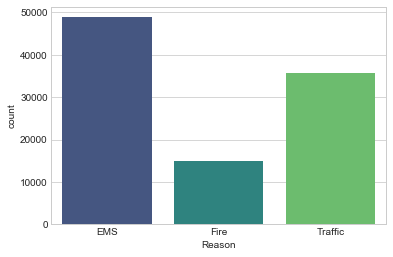

In [13]:
sns.countplot(x='Reason',data=df,palette='viridis')

Następnie zwizualizowaliśmy nasilenie zgłoszeń i w zależności od ich typów w ciągu tygodnia. W tym celu sprawdziliśmy typ danych w kolumnie "timeStamp"

In [14]:
type(df['timeStamp'].iloc[0])

str

Przekonwertowaliśmy dane do wartości odpowiadających datom

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Wyodrębniliśmy poszczególne składowe, przypisaliśmy dni tygodnia

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Oraz stworzyliśmy słownik

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week'] = df['Day of Week'].map(dmap)

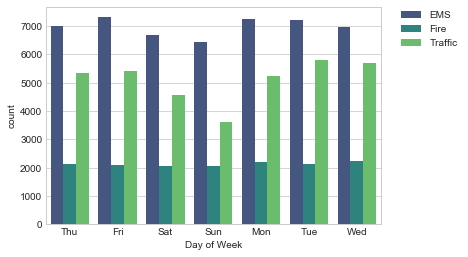

In [19]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Zwizualizowaliśmy również częstotliwość różnych typów zgłoszeń w zależności od miesiąca

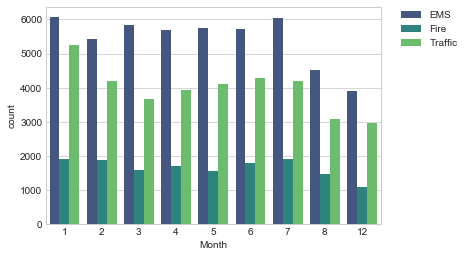

In [20]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


# Następnie zwizualizowaliśmy liczbę miast, z których rejestrowano wezwania w danych miesiącach

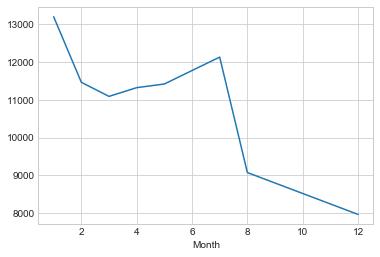

In [22]:
byMonth['twp'].plot()

Dodaliśmy również linię trendu

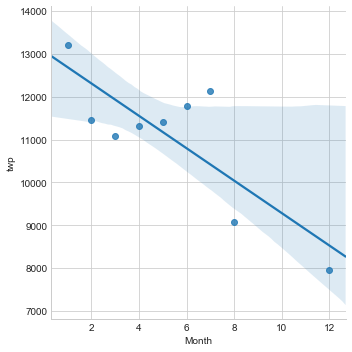

In [23]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [24]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Kolejna wizuwalizacja pokazywała liczbę unikalnych miast/regionów, z których pochodziły wezwania (ujęcie dzienne)

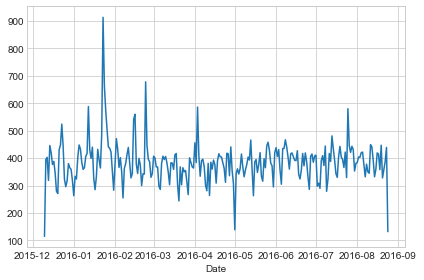

In [25]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Następnie przygotowaliśmy wizualizację dla konkretnych typów wezwań (Traffic, Fire, EMS)

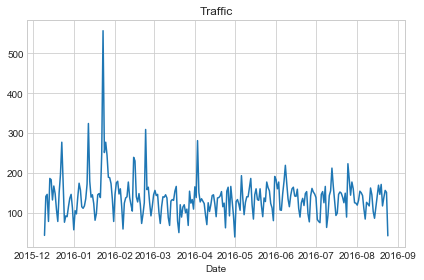

In [26]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

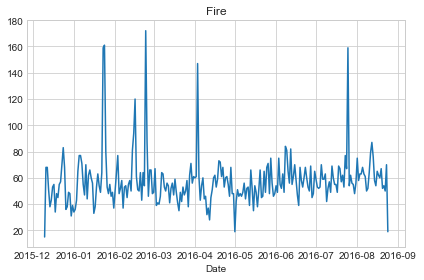

In [27]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

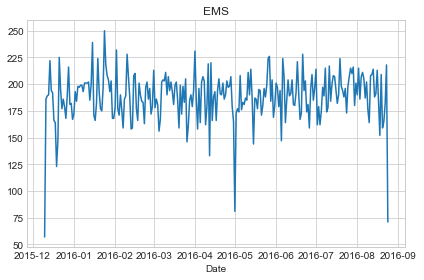

In [28]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Teraz stworzymy mapy ciepła za pomocą seaborn. Najpierw musimy zmienić strukturę tabeli danych, aby kolumny stały się godzinami, a indeks stał się dniem tygodnia. Zastosujemy groupby z metodą unstack.

In [29]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Tworzymy mapę ciepła

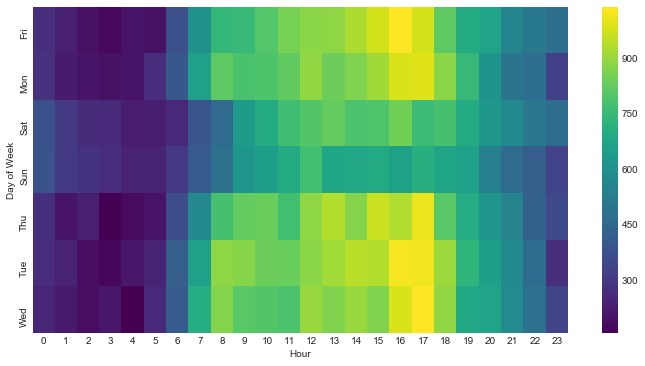

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

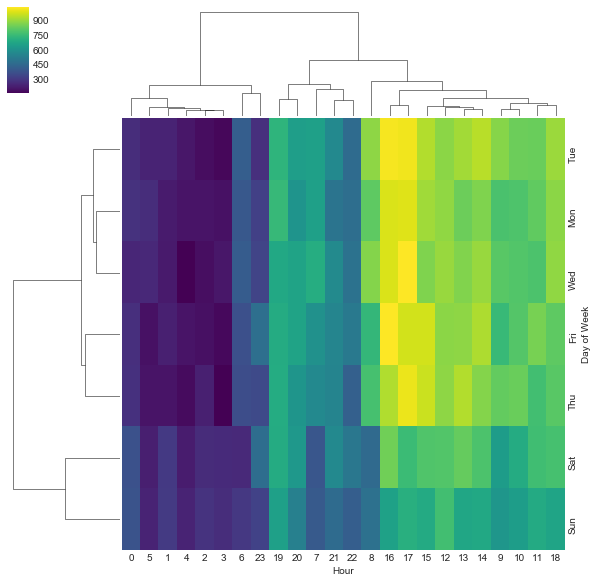

In [32]:
sns.clustermap(dayHour,cmap='viridis')

Teraz powtarzamy te same wykresy i operacje dla elementu DataFrame, który pokazuje miesiąc jako kolumnę.

In [33]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


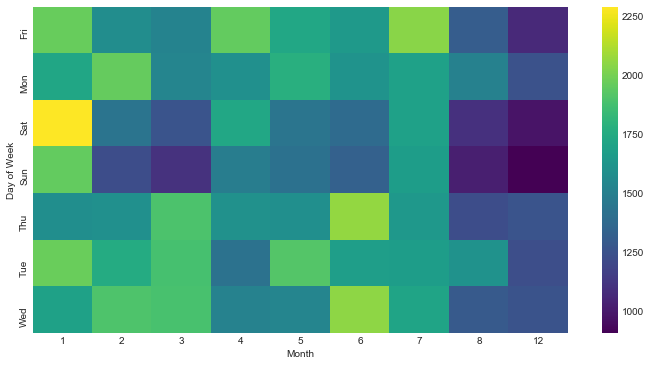

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

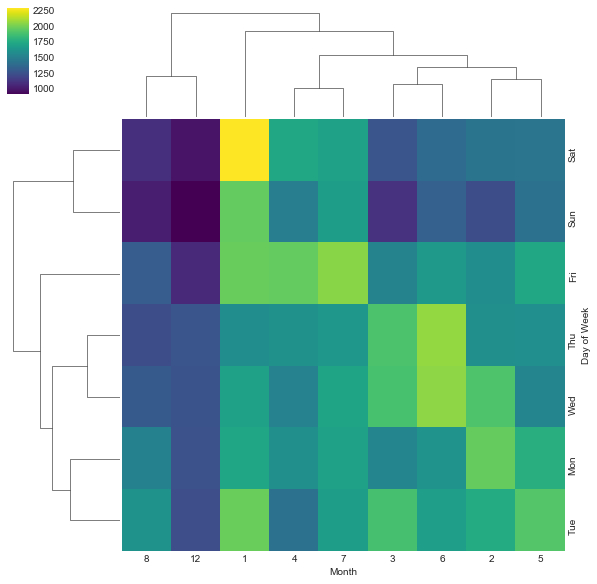

In [35]:
sns.clustermap(dayMonth,cmap='viridis')